# IRIS Flower Classification

### Aim:
 - Classify flower type based on its dimensions
 - O/P: 0 -> Iris-setosa; 1 -> Iris-versicolor; 2 -> Iris-virginica

Dataset: [Click Here](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

Auth: KG   
Date: 11.05.2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Data/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.duplicated().sum()

3

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


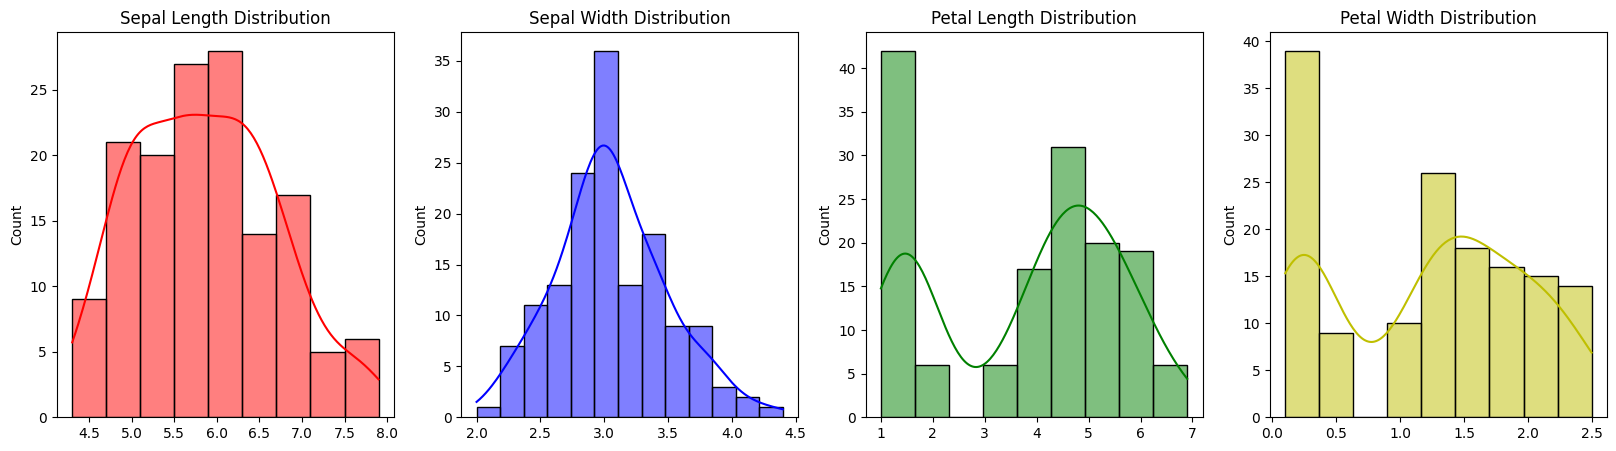

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sepal_length = data['sepal_length'].values
sepal_width = data['sepal_width'].values
petal_length = data['petal_length'].values
petal_width = data['petal_width'].values

sb.histplot(sepal_length, ax=ax[0], color='r', kde=True)
ax[0].set_title('Sepal Length Distribution')

sb.histplot(sepal_width, ax=ax[1], color='b', kde=True)
ax[1].set_title('Sepal Width Distribution')

sb.histplot(petal_length, ax=ax[2], color='g', kde=True)
ax[2].set_title('Petal Length Distribution')

sb.histplot(petal_width, ax=ax[3], color='y', kde=True)
ax[3].set_title('Petal Width Distribution')

plt.show()


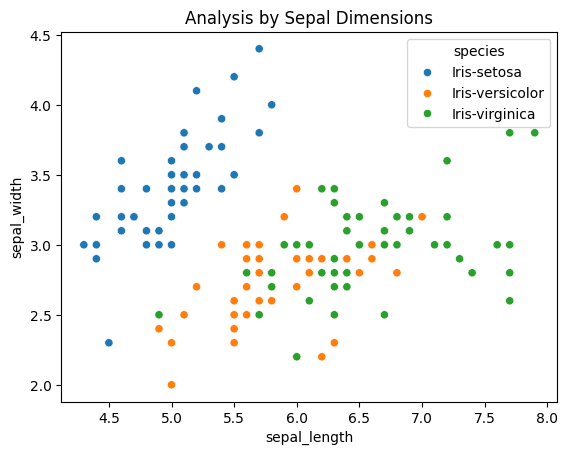

In [10]:
sb.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.title("Analysis by Sepal Dimensions");

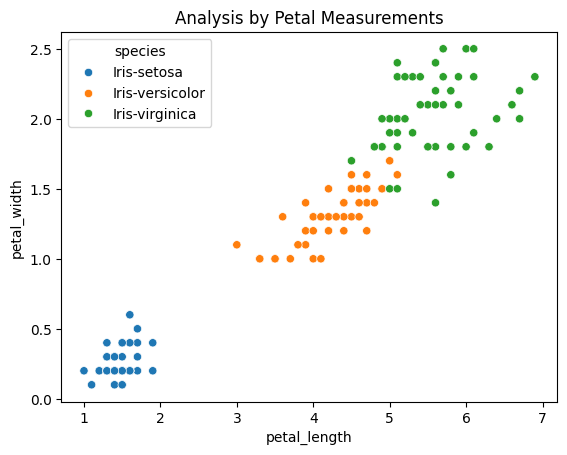

In [11]:

sb.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')
plt.title('Analysis by Petal Measurements');

In [12]:
data['species'] = data['species'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
data['species'].value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

In [13]:
X = data.drop(columns=['species'])
y = data['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=81)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

err = model.score(X_train, y_train) * 100
print('Training Score: {:.2f} %'.format(err))

Training Score: 97.58 %


In [16]:
def test_model(model, input_values):
    prediction = model.predict(input_values)[0]
    if prediction == 0:
        flower_type = 'Iris-Setosa'
    elif prediction == 1:
        flower_type = 'Iris-Versicolor'
    elif prediction == 2:
        flower_type = 'Iris-Virginica'
    else:
        flower_type = 'Unknown'
    return flower_type

In [17]:
input_values = [[5, 3.6, 1.4, 0.2]]

prediction = test_model(model, input_values)

print('FLower type: ', prediction)

FLower type:  Iris-Setosa


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
